In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import scipy
from tqdm.notebook import tqdm  

In [2]:
measles_data = np.array([26800, 9100, 6700, 5400, 4000, 400]) # Measles gradient


In [3]:
RSV_data = np.array([[21523, 18363, 18354],
                     [17765, 14929, 14681],
                     [ 7910,  6497,  7076],
                     [ 8710,  7052,  7234],
                     [ 8470,  7248,  6867],
                     [ 5809,  4852,  4782],
                     [ 5530,  4089,  5031],
                     [ 3802,  2929,  2997],
                     [ 3191,  2742,  2665],
                     [   33,    12,    29]])
RSV_data

array([[21523, 18363, 18354],
       [17765, 14929, 14681],
       [ 7910,  6497,  7076],
       [ 8710,  7052,  7234],
       [ 8470,  7248,  6867],
       [ 5809,  4852,  4782],
       [ 5530,  4089,  5031],
       [ 3802,  2929,  2997],
       [ 3191,  2742,  2665],
       [   33,    12,    29]])

In [4]:
EBOV_data = np.array([[3322,3013,2345,1697,1079,584,228], # Ebola Gradient
                      [651,663,435,482,254,180,43]]).T
EBOV_data

array([[3322,  651],
       [3013,  663],
       [2345,  435],
       [1697,  482],
       [1079,  254],
       [ 584,  180],
       [ 228,   43]])

In [5]:
MV_data = np.array([[851,688,493,388,336,211,48], # Marbug Gradient
                      [108,103,57,59,44,30,5]]).T
MV_data

array([[851, 108],
       [688, 103],
       [493,  57],
       [388,  59],
       [336,  44],
       [211,  30],
       [ 48,   5]])

In [6]:
# VSV data normalized to cpm of starting mRNA 
vsv_data = np.array([1, .68, .48, .32, .07])
vsv_data = (vsv_data /  np.sum(vsv_data)) * (1.25e4)
vsv_data = vsv_data.astype(int)
vsv_data

array([4901, 3333, 2352, 1568,  343])

In [7]:
# counts determined based on average number of mRNA in a mammalian cell PubMed ID23897237
# and fraction of viral mRNA:total cellular mRNA

PIV2_data = np.array([[47.25,20.44,14.78,13.10,7.49,1.64], # PIV2 gradients
                      [47.28,19.58,13.76,10.93,6.31,0.91],
                      [48.10,21.27,13.71,10.87,5.80,0.98]]).T
PIV2_data =PIV2_data/np.sum(PIV2_data, axis = 0)
PIV2_tot = ( np.array([8.33,16.46,19.58])/100 ) * 200000
PIV2_data = PIV2_tot * PIV2_data
PIV2_data = PIV2_data.astype(int)
PIV2_data

array([[ 7518, 15758, 18699],
       [ 3252,  6526,  8268],
       [ 2351,  4586,  5329],
       [ 2084,  3642,  4225],
       [ 1191,  2103,  2254],
       [  260,   303,   380]])

In [8]:
PIV5_data = np.array([[35.08, 22.27,15.87, 11.09, 11.56, 5.95, 0.20],# PIV5 gradients
                      [37.89, 20.49, 13.55, 10.68, 10.28, 6.11, 0],
                      [27.94, 15.92, 17.27, 14.48, 12.21, 11.82, 0.18]]).T
PIV5_data =PIV5_data/np.sum(PIV5_data, axis = 0)
PIV5_tot = ( np.array([4.77,4.39,2.47])/100 ) * 200000
PIV5_data = PIV5_tot * PIV5_data
PIV5_data = PIV5_data.astype(int)
PIV5_data

array([[3280, 3360, 1382],
       [2082, 1817,  787],
       [1484, 1201,  854],
       [1037,  947,  716],
       [1080,  911,  604],
       [ 556,  541,  584],
       [  18,    0,    8]])

In [9]:
PIV3_data = np.array([[32.28,19.57,20.74,16.17,10.61,1.35], # PIV3 gradients
                      [28.42,15.60,21.95,18.07,14.57,0.30],
                      [28.52,16.66,20.09,16.55,17.80,0.66],
                      [32.08,22.07,17.10,12.61,15.36,0.73]]).T
PIV3_data =PIV3_data/np.sum(PIV3_data, axis = 0)

PIV3_tot = ( np.array([10, 17.45,16.55,12.56])/100 ) * 200000
PIV3_data = PIV3_tot * PIV3_data
PIV3_data = PIV3_data.astype(int)
PIV3_data

array([[ 6409, 10027,  9413,  8062],
       [ 3886,  5504,  5499,  5546],
       [ 4118,  7744,  6631,  4297],
       [ 3210,  6375,  5462,  3169],
       [ 2106,  5140,  5875,  3860],
       [  268,   105,   217,   183]])

In [10]:
MuV_data = np.array([[30.13,27.56,15.30,10.41,9.88,6.28,2.34], # Mumps gradients
                      [30.48,31.26,14.55,8.15,7.69,5.45,1.47],
                      [31.32,34.62,12.92,6.83,6.95,4.63,1.16]]).T
MuV_data = MuV_data/np.sum(MuV_data, axis = 0)
MuV_tot = ( np.array([9.97,16.88,15.95])/100 ) * 200000
MuV_data = MuV_tot * MuV_data
MuV_data = MuV_data.astype(int)
MuV_data

array([[ 5895, 10388, 10150],
       [ 5392, 10654, 11219],
       [ 2993,  4959,  4187],
       [ 2037,  2777,  2213],
       [ 1933,  2621,  2252],
       [ 1228,  1857,  1500],
       [  457,   501,   375]])

In [11]:
# define list of virus names
viruses = ["VSV", "MeV", "PIV2", "PIV3", "PIV5", "MuV", "EBOV", "MV", "RSV"]
# define list of virus genes and their orders
virus_gene_names = [
    ['N', 'P', 'M', 'G', 'L'],
    ['N', 'P', 'M', 'F', "H", 'L'],
    ['NP', 'VIP', 'M', 'F', "HN", 'L'],
    ['NP', 'P/D/C', 'M', 'F', "HN", 'L'], 
    ['NP', 'VIP', 'M', 'F', "SH","HN", 'L'],
    ['NP', 'V/P', 'M', 'F', "SH","HN", 'L'],
    ["NP", "VP35", "VP40", "GP", "VP30", "VP24", "L"],
    ["NP", "VP35", "VP40", "GP", "VP30", "VP24", "L"],
    ["NS1", "NS2", "N", "P", "M", "SH", "G", "F", "M2", "L"]]
# define list of mean expression of each gene for each virus
virus_data = [vsv_data, measles_data, PIV2_data, PIV3_data, PIV5_data, MuV_data, EBOV_data, MV_data, RSV_data]





In [12]:
# define lists of position of gene stop signal for each gene
VSV_genome_pos = np.array([1376, 2199, 3039, 4713, 11095])
VSV_genome_pos = np.array(VSV_genome_pos - np.min(VSV_genome_pos))
VSV_genome_pos

#
measles_genome_pos =  np.array([1744,3402,4872,7247,9208,15854])
measles_genome_pos = np.array(measles_genome_pos - np.min(measles_genome_pos))
measles_genome_pos

#
PIV2_genome_pos =  np.array([1915, 3361,4738,6626,8738,15621])
PIV2_genome_pos = np.array(PIV2_genome_pos - np.min(PIV2_genome_pos))
PIV2_genome_pos

#
PIV3_genome_pos =  np.array([1658, 3595,4814,6691,8524,15347])
PIV3_genome_pos = np.array(PIV3_genome_pos - np.min(PIV3_genome_pos))
PIV3_genome_pos

#
PIV5_genome_pos =  np.array([1787, 3092,4478,6219,6515,8392,15215])
PIV5_genome_pos = np.array(PIV5_genome_pos - np.min(PIV5_genome_pos))
PIV5_genome_pos

#
MuV_genome_pos =  np.array([1906, 3226,4481,6210, 6533, 8428, 15360])
MuV_genome_pos = np.array(MuV_genome_pos - np.min(MuV_genome_pos))
MuV_genome_pos

RSV_genome_pos = np.array([576,1098,2327,3242,4209,4628,5595,7550,8557,15067])
RSV_genome_pos = np.array(RSV_genome_pos - np.min(RSV_genome_pos))
RSV_genome_pos

EBOV_genome_pos =  np.array([3026,4407,5894,8305,9740,11518,18282])
EBOV_genome_pos = np.array(EBOV_genome_pos - np.min(EBOV_genome_pos))
EBOV_genome_pos

MV_genome_pos =  np.array([2844,4410,5819,8670,10016,11285,19037])
MV_genome_pos = np.array(MV_genome_pos - np.min(MV_genome_pos))
MV_genome_pos

virus_genome_pos = [VSV_genome_pos, measles_genome_pos, PIV2_genome_pos, PIV3_genome_pos, PIV5_genome_pos, MuV_genome_pos, EBOV_genome_pos, MV_genome_pos, RSV_genome_pos]



In [13]:
overlaps =[[]] * 6 +  [[2, 4, 6], [5], [9]]
overlaps

[[], [], [], [], [], [], [2, 4, 6], [5], [9]]

In [14]:
# objective function for fitting model

def obj_fun(x):
    p = x[0]
    p_trans = x[1]
    pred = np.array([p**x * p_trans for x in genome_pos])
    for t in ov:
        pred[ov] = pred[ov] * (1-p_trans)
    lambda_pred = pred/np.sum(pred)
    LL = 0
    if len(dv.shape) == 1:
        LL += np.sum(scipy.stats.poisson.logpmf(dv, lambda_pred))
        if np.isnan(LL):
            return np.inf
        return LL * -1
    else:
        for i in range(dv.shape[1]):
            LL += np.sum(scipy.stats.poisson.logpmf(dv[:,i], lambda_pred))
        if np.isnan(LL):
            return np.inf
        return LL * -1
    

In [ ]:
# iterate through each virus and fit the model 100,000 times starting at random positions.

all_fits = []
all_funcs = []
for j in range(len(viruses)):
    fits = []
    funcs = []
    dv = np.array(virus_data[j])
    ov = overlaps[j]
    genome_pos = virus_genome_pos[j]
    for i in range(200000):
        res = minimize(obj_fun,( np.random.random(2) * np.array([0.5, 1]) ) + np.array([0.5, 0]), bounds = [[0.5, 1], [0, 1]], tol = 1e-20)
        fits.append(res.x)
        funcs.append(res.fun * -1)
    all_fits.append(fits)
    all_funcs.append(funcs)
    print(viruses[j])
all_fits = np.array(all_fits)




In [ ]:
dfs = []
for i in range(len(viruses)):
    df = pd.concat( [pd.DataFrame(all_fits[i]) , pd.DataFrame(all_funcs[i])], axis = 1)
    df.columns = ["p(walk)", "ptransc", "Log Likelihood"]
    df.to_csv(f"Folder1-Parameter_Fits/{viruses[i]}_fits.csv")
    df = df[df.iloc[:,-1] == np.max(df.iloc[:,-1])].iloc[0]
    dfs.append(df)
dfs = pd.concat(dfs, axis = 1).T
dfs.index = viruses

dfs.to_csv(f"Folder1-Parameter_Fits/all_viruses_best_fits.csv")

In [15]:
dfs = pd.read_csv(f"Folder1-Parameter_Fits/all_viruses_best_fits.csv", index_col=0)


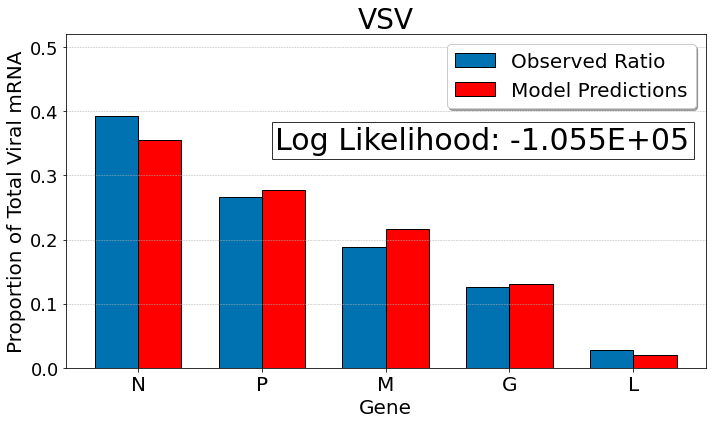

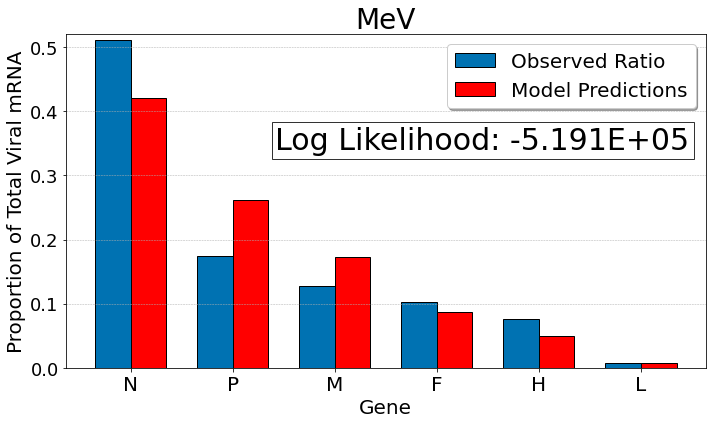

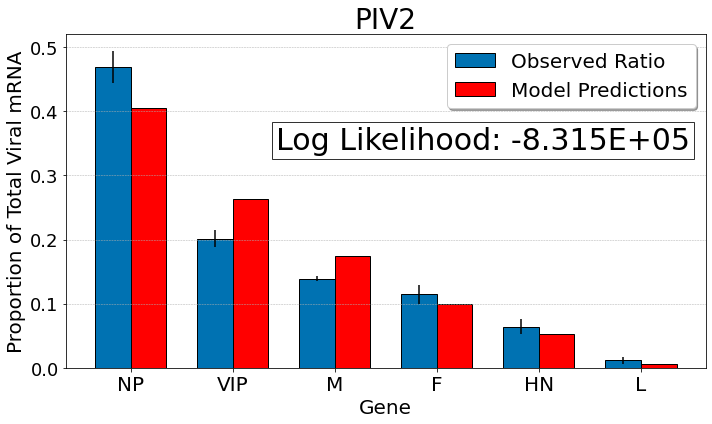

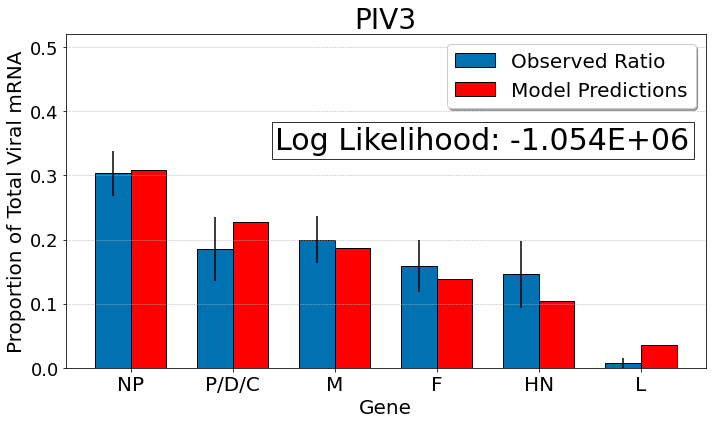

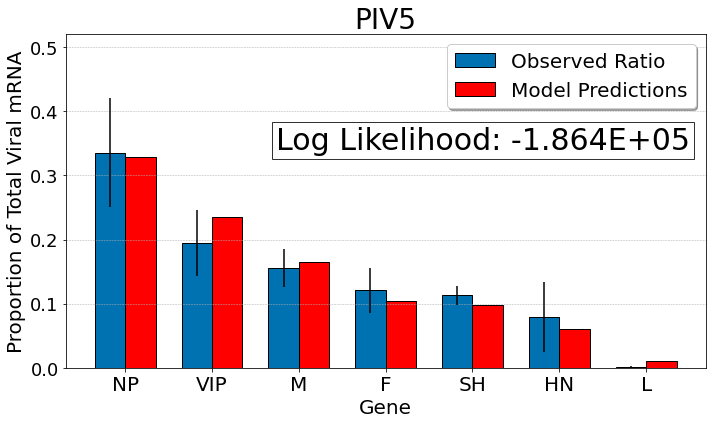

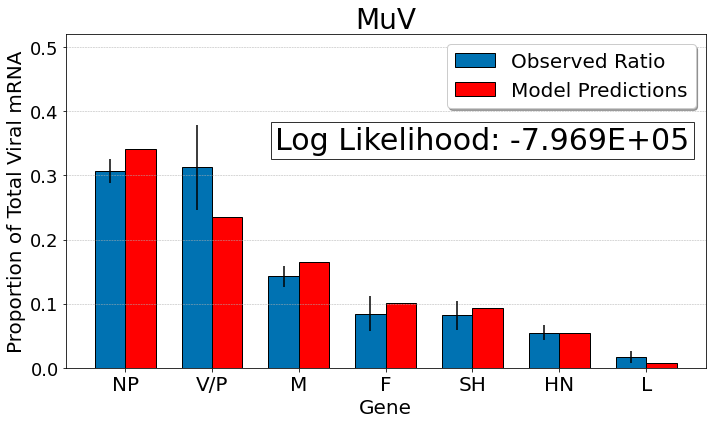

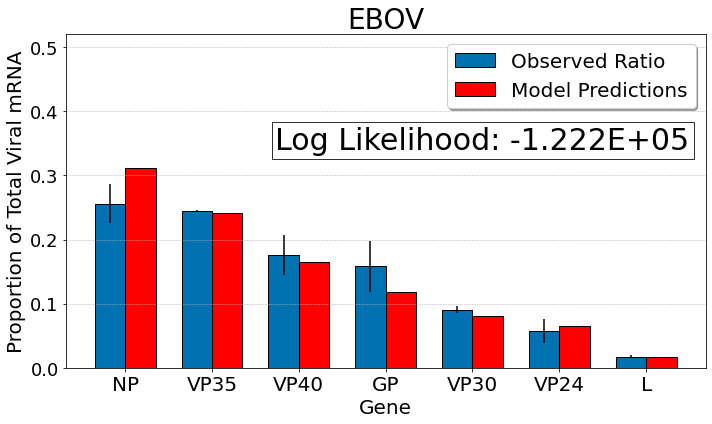

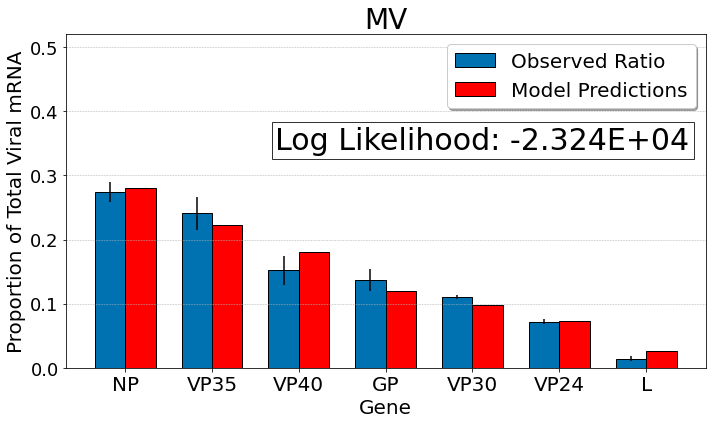

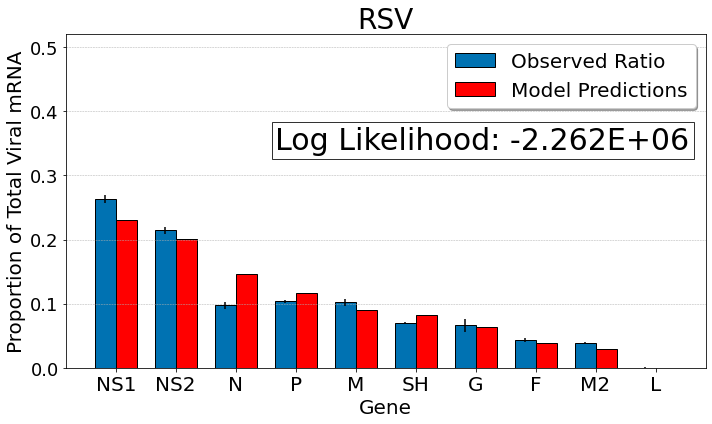

In [16]:
# Generate barplots of observed gradients and predicted gradients

for i in range(len(viruses)):
    genome_pos = virus_genome_pos[i]    
    pars = list(dfs.iloc[i][0:2])
    ov = overlaps[i]
    p = pars[0]
    p_trans = pars[1]
    pred = np.array([p**x * p_trans for x in genome_pos])
    for t in ov:
        pred[ov] = pred[ov] * (1-p_trans)
    pred_norm = pred/np.sum(pred)    
    categories = virus_gene_names[i]
    indices = np.arange(len(categories))
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    # Create bars
    bar_width = 0.35
    ax.set_title(f'{viruses[i]}', fontsize=28)
    if len(virus_data[i].shape) == 1:
        data_norm = virus_data[i]/np.sum(virus_data[i])
        ax.bar(indices - bar_width/2, data_norm, width=bar_width, color='#0072B2', edgecolor='black', label='Observed Ratio')
    else:
        data_norm = virus_data[i]/np.sum(virus_data[i],axis=0)
        ax.bar(indices - bar_width/2, np.mean(data_norm, axis = 1), width=bar_width, yerr= 2 * np.std(data_norm, axis = 1), color='#0072B2', edgecolor='black', label='Observed Ratio')
    # Increase y-axis label size
    ax.tick_params(axis='y', labelsize=18)
    # Create bars for pred_norm
    ax.bar(indices + bar_width/2, pred_norm, width=bar_width, color='red', edgecolor='black', label='Model Predictions')
    # Set legend with improved positioning and styling
    ax.legend(loc='best', fontsize=20, frameon=True, shadow=True)
    # Set labels, title, and ticks
    ax.set_xticks(indices)
    plt.ylim([0,.52])
    
    mse = float(dfs.iloc[i][-1])
    ax.set_xticklabels(categories, fontsize=20)
    ax.set_ylabel('Proportion of Total Viral mRNA', fontsize=20)
    ax.set_xlabel('Gene', fontsize=20)
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5) 
    ax.text(.975, 0.725, 'Log Likelihood: {:.3E}'.format(mse) , transform=ax.transAxes, fontsize=30,
            verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))
    plt.tight_layout()
    plt.savefig(f"Figures/Fig2/{viruses[i]}_Gradients.svg")
    plt.show()   
    
    
    

In [17]:
# define code for performing MCMC
# This code is taken from the MCMC section of the UQ-Bio 2024 Github
# https://github.com/MunskyGroup/uqbio2024

def likelihood_ge(x):
    p = x[0]
    p_trans = x[1]
    pred = np.array([p**x * p_trans for x in genome_pos])
    for t in ov:
        pred[ov] = pred[ov] * (1-p_trans)
    lambda_pred = pred/np.sum(pred)
    LL = 0
    if len(dv.shape) == 1:
        LL += np.sum(scipy.stats.poisson.logpmf(dv, lambda_pred))
        if np.isnan(LL):
            return np.inf
        return LL
    else:
        for i in range(dv.shape[1]):
            LL += np.sum(scipy.stats.poisson.logpmf(dv[:,i], lambda_pred))
        if np.isnan(LL):
            return np.inf
        return LL
    
def prior_ge(h):
    return np.log(scipy.stats.norm(p, scale= 1).pdf(h[0])) + np.log(scipy.stats.norm(ptransc, scale= 1).pdf(h[0]))


def posterior_unnormalised_ge(h):
    return likelihood_ge(h) + prior_ge(h)

def logposterior_unnormalised_ge(x):
    rho = x
    log_likelihood = likelihood_ge(rho)
    log_prior = prior_ge(rho)
    return log_likelihood + log_prior



In [18]:

def simulate_step(log_target, proposal_width, x):
    """
    Perform one step of the MH algorithm starting at `x`, with a normal distribution
    for the proposal. `log_target` is the logarithm of the target distribution
    and `proposal_width` is the width of the proposal distribution. Returns the next
    sample.
    """
    # propose a new value
    y = x + proposal_width * np.random.randn(len(x))
    if np.any(y < 0) or np.any(y > 1):
        return x  # Reject proposal and return current value
    log_alpha = np.sum(log_target(y) - log_target(x))    # the q-terms cancel
    if log_alpha > 0:
        return y           # accept
    alpha = np.exp(log_alpha)
    p = np.random.rand()
    if p < alpha:        # this happens with probability alpha
        return y           # accept
    else:
        return x           # reject
def metropolis_hastings(log_target, proposal_width, nsteps, x0):
    """
    Perform MCMC by running the Metropolis-Hastings algorithm for `nsteps` steps,
    starting at `x0`. `log_target` is the logarithm of the target distribution
    and `proposal_width` is the width of the proposal distribution. Returns a matrix
    of samples.
    """
    ret = np.zeros((nsteps, len(x0)))
    ret[0] = x0
    for i in tqdm(range(1, nsteps)):
        ret[i] = simulate_step(log_target, proposal_width, ret[i-1])
    return ret

In [19]:

MCMC_outs = []
for j in range(len(viruses)):
    dv = np.array(virus_data[j])
    pars = list(dfs.iloc[j][0:2])
    ov = overlaps[j]
    p = pars[0]
    ptransc = pars[1]    
    genome_pos = virus_genome_pos[j]
    nsamples = 1001000
    burnin = 1000
    post_ge_mcmc = metropolis_hastings(logposterior_unnormalised_ge, .1, nsamples, np.array([p, ptransc]))
    post_ge_mcmc = post_ge_mcmc[burnin:]  
    MCMC_outs.append(post_ge_mcmc) 


    
    



  0%|          | 0/1000999 [00:00<?, ?it/s]

  0%|          | 0/1000999 [00:00<?, ?it/s]

  0%|          | 0/1000999 [00:00<?, ?it/s]

  0%|          | 0/1000999 [00:00<?, ?it/s]

  0%|          | 0/1000999 [00:00<?, ?it/s]

  0%|          | 0/1000999 [00:00<?, ?it/s]

  0%|          | 0/1000999 [00:00<?, ?it/s]

  0%|          | 0/1000999 [00:00<?, ?it/s]

  0%|          | 0/1000999 [00:00<?, ?it/s]

In [20]:

MCMC_outs = np.array(MCMC_outs)
np.save("Folder2-MCMC_Outputs/model_MCMC_Raw.npy", MCMC_outs)


In [21]:
MCMC_outs = np.load("Folder2-MCMC_Outputs/model_MCMC_Raw.npy")

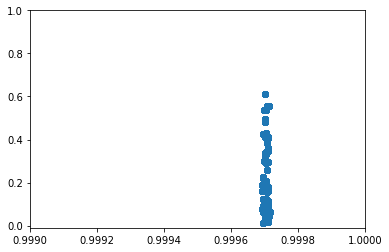

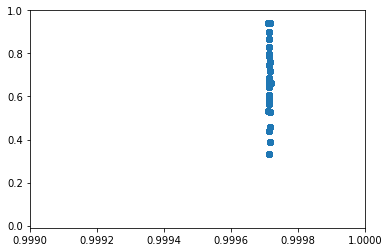

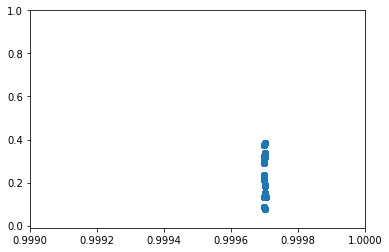

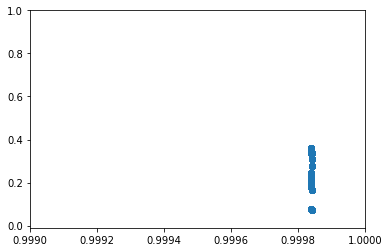

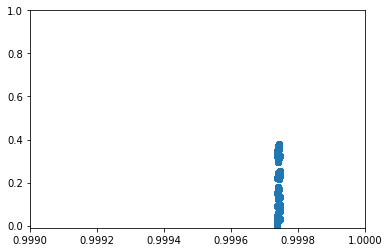

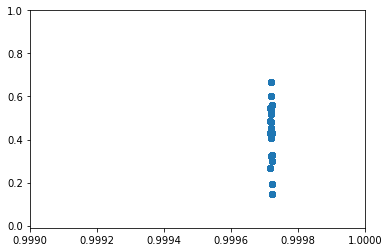

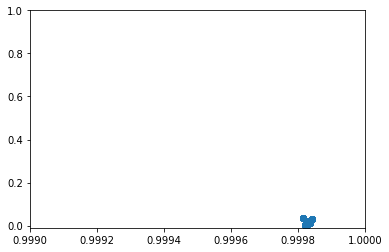

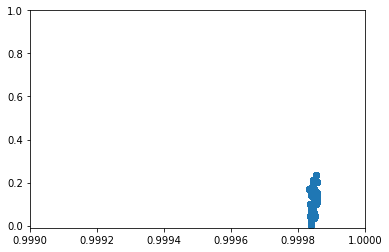

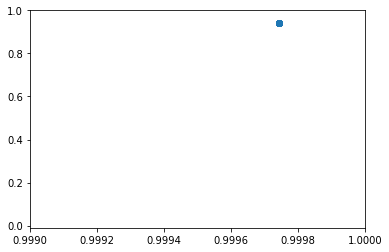

In [22]:
for i in range(9):
    x = MCMC_outs[i]
    plt.scatter(x[:,0], x[:,1])
    plt.ylim(-.01,1)
    plt.xlim(.999,1)
    plt.show()

In [24]:




df = pd.DataFrame([np.array([list(x) for x in list(zip(viruses,viruses))]).flatten(), ["p(walk)", "ptransc"] * len(viruses), np.mean(MCMC_outs, axis = 1).flatten(), np.quantile(MCMC_outs, .025, axis = 1).flatten(), np.quantile(MCMC_outs, .5, axis = 1).flatten(), np.quantile(MCMC_outs, .975, axis = 1).flatten()])
df = df.T
df.columns =  ["Virus","Parameter", "Mean", "2.5% Quantile", "50% Quantile","97.5% Quantile" ]
df.to_csv("Folder2-MCMC_Outputs/model_MCMC_statistics.csv")
df


,Virus,Parameter,Mean,2.5% Quantile,50% Quantile,97.5% Quantile
0,VSV,p(walk),0.999706,0.999696,0.999706,0.999717
1,VSV,ptransc,0.214687,0.01917,0.186279,0.553553
2,MeV,p(walk),0.999714,0.999712,0.999714,0.999717
3,MeV,ptransc,0.743685,0.43774,0.789952,0.93949
4,PIV2,p(walk),0.9997,0.999698,0.9997,0.999701
5,PIV2,ptransc,0.268691,0.084664,0.30036,0.386117
6,PIV3,p(walk),0.999841,0.999839,0.99984,0.999842
7,PIV3,ptransc,0.238622,0.073058,0.245498,0.337373
8,PIV5,p(walk),0.999743,0.999737,0.999742,0.999747
9,PIV5,ptransc,0.168341,0.019271,0.143365,0.358339
